# Life Expectancy (WHO)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import dtale

from IPython.display import Image

In [3]:
df = pd.read_csv('life_expectancy_data.csv')
desc = pd.read_csv('data_description.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.rename(columns={'Country': 'country', 'Year': 'year', 'Status': 'status', 'Life expectancy ': 'life_expectancy', 'Adult Mortality':'adult_mortality', 'infant deaths':'infant_deaths', 'Alcohol':'alcohol', 'percentage expenditure':'percentage_expenditure', 'Hepatitis B':'hepatitis_b', 'Measles ':'measles', ' BMI ':'bmi', 'under-five deaths ':'under_five_deaths', 'Polio':'polio', 'Total expenditure':'total_expenditure', 'Diphtheria ':'diphtheria', ' HIV/AIDS':'hiv_aids', 'GDP':'gdp', 'Population':'population', ' thinness  1-19 years':'thinness_10-19', ' thinness 5-9 years':'thinness_5-9', 'Income composition of resources':'income_composition', 'Schooling':'schooling'}, inplace=True)
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10-19,thinness_5-9,income_composition,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
desc

,Variable,Type,Definition
0,Country,Categorical,Country
1,Year,Categorical,Year
2,Status,Categorical,Status refers to whether a nation is Developin...
3,Life expectancy,Numerical,Life expectancy�is a statistical measure of th...
4,Adult Mortality,Numerical,Probability of dying between 15 and 60 years p...
5,infant deaths,Numerical,"The number of deaths per 1,000 live births of ..."
6,Alcohol,Numerical,Alcohol consumption per capita for people aged...
7,percentage expenditure,Numerical,Expenditure on health as a percentage of GDP p...
8,Hepatitis B,Numerical,HepB immunization coverage among 1-year olds(%)
9,Measles,Numerical,No of reported cases per 1000 population


## Inexplicit Nulls or Faulty Data:

##### [Dtale Library](https://www.youtube.com/watch?v=xSXGcuiEzUc)

In [28]:
dtale.show(df)

###### Ranges for every column for deciding Inexplicit Nulls:

* Adult Mortality: Min=35 ,Max=Remove Outliers
* [Infant Deaths](https://www.cia.gov/the-world-factbook/field/infant-mortality-rate/country-comparison): Min=1, Max=177
* [Hepatitis B](https://apps.who.int/gho/data/node.main.A828?lang=en): Min=10, Max=X
* BMI of 1 and 87.3 are highly unrealistic. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
* [Measles](https://apps.who.int/gho/data/view.main.1540_62), Min=1
* [Polio](https://apps.who.int/gho/data/node.main.A831?lang=en): Remove Outliers
* Under 5 deaths
* Total Expenditure: Outliers are important.
* [Diptheria immunization](https://apps.who.int/gho/data/node.main.A827): Check outliers.
* [HIV/AIDS](https://en.wikipedia.org/wiki/List_of_countries_by_HIV/AIDS_adult_prevalence_rate): Outliers are important.
* GDP: Outliers are important.
* Thinness 10-19: Outliers are important.
* Thinness 5-9: Outliers are important.
* Income composition: Outlier = 0
* Schooling: Remove outliers

In [8]:
print("Total null values excluding inexplicit nulls")
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

Total null values excluding inexplicit nulls


,Total Null Val,Null Value %
population,652,22.191967
hepatitis_b,553,18.822328
gdp,448,15.248468
total_expenditure,226,7.692308
alcohol,194,6.603131
income_composition,167,5.684139
schooling,163,5.547992
bmi,34,1.157250
thinness_10-19,34,1.157250
thinness_5-9,34,1.157250


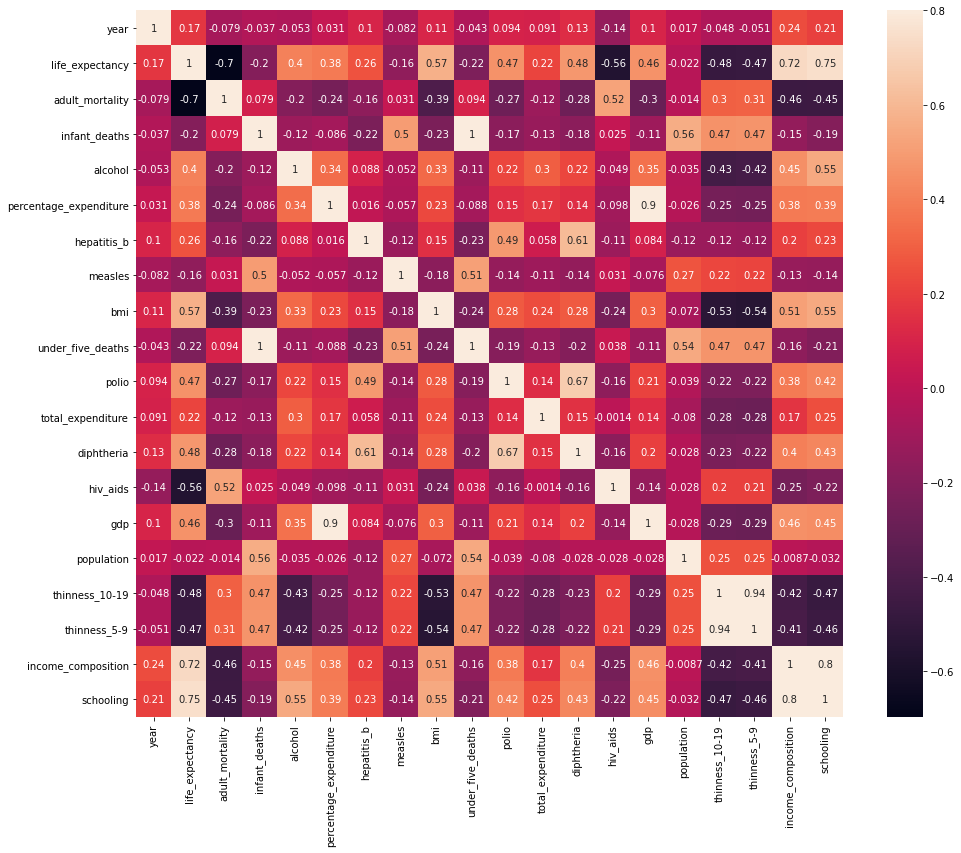

In [9]:
##### Correlation matrix (heatmap style)

corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

##### Converting all faulty values to nulls. 

In [10]:
df.adult_mortality = df.apply(lambda x: np.nan if x.adult_mortality < 35 or x.adult_mortality > 459  else x.adult_mortality, axis=1)
df.infant_deaths = df.apply(lambda x: np.nan if x.infant_deaths < 1 or x.infant_deaths > 177  else x.infant_deaths, axis=1)
df.hepatitis_b = df.apply(lambda x: np.nan if x.hepatitis_b < 15 else x.hepatitis_b, axis=1)
df.measles = df.apply(lambda x: np.nan if x.measles < 1 else x.measles, axis=1)
df.bmi = df.apply(lambda x: np.nan if x.bmi < 15 or x.bmi > 40  else x.bmi, axis=1)
df.polio = df.apply(lambda x: np.nan if x.polio < 23  else x.polio, axis=1)
df.diphtheria = df.apply(lambda x: np.nan if x.diphtheria < 16 else x.diphtheria, axis=1)
df.income_composition = df.apply(lambda x: np.nan if x.income_composition == 0 else x.income_composition, axis=1)
df.schooling = df.apply(lambda x: np.nan if x.schooling < 2.8 else x.schooling, axis=1)

Drop Percentage Expenditure (Reason:)<br>
Drop Population (Reason:)<br> 
Drop bmi (Reason:)<br> 



In [11]:
df.drop('percentage_expenditure', inplace= True, axis=1)
df.drop('population', inplace= True, axis=1)
print(f'After dropping features, shape of data: {df.shape}')

After dropping features, shape of data: (2938, 20)


In [12]:
col_na = df.columns[df.isnull().any()]
df_na_cnt = df[col_na].isnull().sum()
df_na = (df[col_na].isnull().sum()/len(df)) * 100
df_na = pd.DataFrame({'Total Null Val': df_na_cnt, 'Null Value %': df_na})
df_na = df_na.sort_values(by='Null Value %', ascending=False)
df_na

,Total Null Val,Null Value %
bmi,1976,67.256637
measles,983,33.458135
infant_deaths,941,32.028591
hepatitis_b,721,24.540504
adult_mortality,528,17.971409
gdp,448,15.248468
income_composition,297,10.108918
total_expenditure,226,7.692308
alcohol,194,6.603131
polio,192,6.535058


In [13]:
df.drop('bmi', inplace= True, axis=1) #67% misssing
df.drop('measles', inplace= True, axis=1) #33.5% misssing and corr with dep. variable  = -0.15, 

In [14]:
# Drop rows with missing values in Life expectancy.
df1 = df.dropna( how='any', subset=['life_expectancy'])

In [15]:
df1['life_expectancy'].isnull().sum().max()

0

In [48]:
df1.to_csv('df_without_inex.nulls.csv', index = False)

In [23]:
col_na = df1.columns[df1.isnull().any()]
df1_na_cnt = df1[col_na].isnull().sum()
df1_na = (df1[col_na].isnull().sum()/len(df)) * 100
df1_na = pd.DataFrame({'Total Null Val': df1_na_cnt, 'Null Value %': df1_na})
df1_na = df1_na.sort_values(by='Null Value %', ascending=False)
df1_na

,Total Null Val,Null Value %
infant_deaths,931,31.688223
hepatitis_b,719,24.472430
adult_mortality,518,17.631042
gdp,443,15.078285
income_composition,290,9.870660
total_expenditure,226,7.692308
alcohol,193,6.569095
polio,191,6.501021
diphtheria,188,6.398911
schooling,186,6.330837


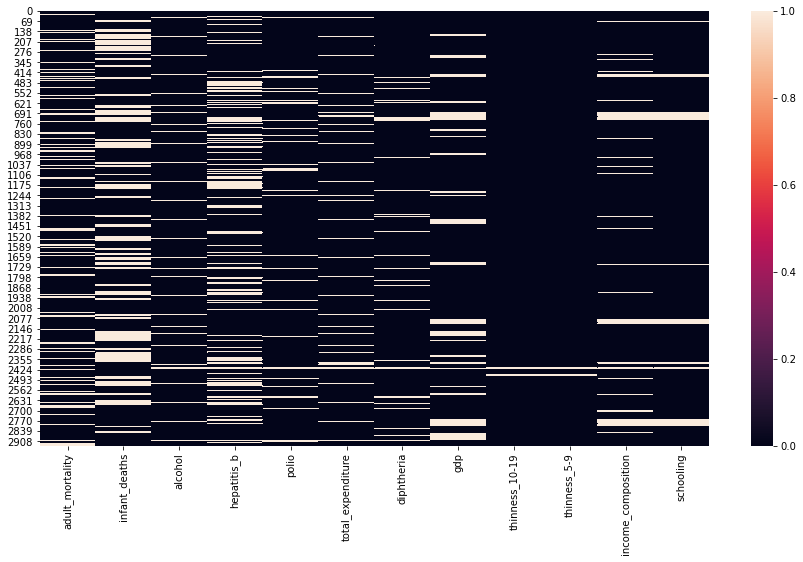

In [27]:
plt.figure(figsize=(15, 8))
sns.heatmap(df1[col_na].isnull())
plt.show()